PART C: Classifier <br>
Q4) Chronic Kidney Dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
ckd_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/ckd.csv')
ckd_df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [65]:
ckd_df.columns[ckd_df.isna().any()]

Index([], dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ckd_df['Hemoglobin_n'] = scaler.fit_transform(np.array(ckd_df['Hemoglobin']).reshape(-1, 1))
ckd_df['Blood_glucose_n'] = scaler.fit_transform(np.array(ckd_df['Blood Glucose Random']).reshape(-1, 1))

In [67]:
X = ckd_df.loc[:, ['Hemoglobin_n', 'Blood_glucose_n']]
y = ckd_df.loc[:, 'Class']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

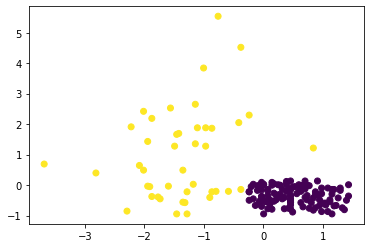

In [69]:
plt.scatter(ckd_df['Hemoglobin_n'], ckd_df['Blood_glucose_n'], c=y)

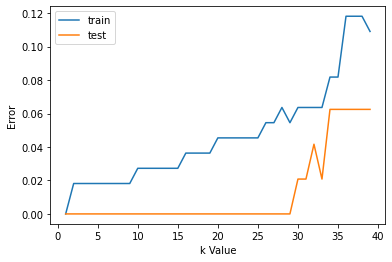

In [70]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
plt.plot(range(1,40), error1, label="train")
plt.plot(range(1,40), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [71]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=9)

In [72]:
knn.score(X_test.values, y_test)

1.0

In [73]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0],
       [ 0, 10]])

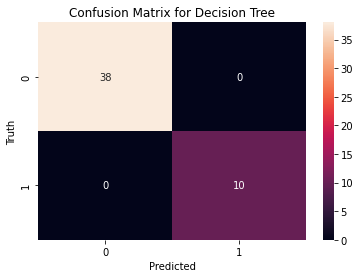

In [74]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [76]:
knn.predict([[0, 1.1]])

array([0])

Alice is predicted to not have chronic kidney disease based on her hemoglobin and blood glucose levels by the KNN Classifier.

Decision Tree

In [77]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

In [78]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [79]:
model.score(X_train, y_train)

1.0

In [80]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

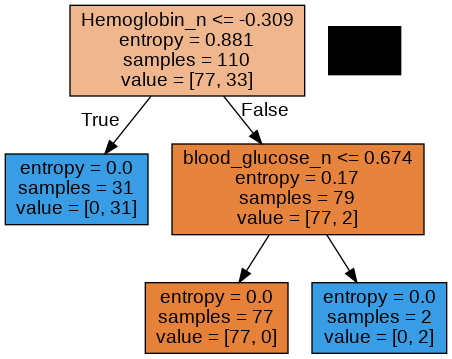

In [81]:
dot_data = StringIO()
export_graphviz(model, feature_names=["Hemoglobin_n", "blood_glucose_n"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [82]:
y_predict = model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt

array([[38,  0],
       [ 0, 10]])

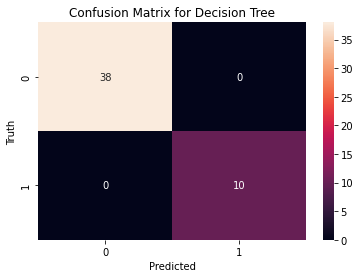

In [83]:
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [84]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [85]:
model.predict([[0, 1.1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

The decision tree predicts alice to have Chronic Kidney Disease(CKD) based on her Hemoglobin and Blood Glucose levels.

Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [87]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [89]:
model.score(X_test, y_test)

1.0

In [90]:
y_predict = model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_predict)
cm_lr

array([[38,  0],
       [ 0, 10]])

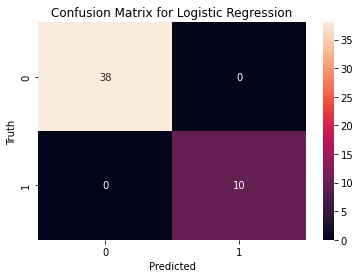

In [91]:
sns.heatmap(cm_lr, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [92]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [93]:
model.predict([[0, 1.1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

The Logistic Regression model predicts Alice to have CKD.

Q5) Wine Dataset

In [94]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/wine.csv')
wine_df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
wine_df.columns[wine_df.isna().any()]

Index([], dtype='object')

In [96]:
target = wine_df['Class']
inputs = wine_df.drop('Class', axis=1)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

KNN

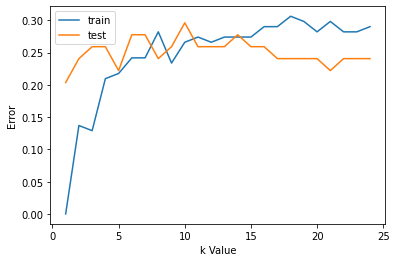

In [98]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
plt.plot(range(1,25), error1, label="train")
plt.plot(range(1,25), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [99]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [100]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
knn_model.score(X_test, y_test)

0.7777777777777778

In [102]:
y_pred = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[17,  1,  2],
       [ 1, 18,  5],
       [ 1,  2,  7]])

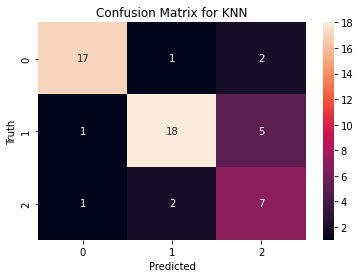

In [103]:
sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       0.86      0.75      0.80        24
           3       0.50      0.70      0.58        10

    accuracy                           0.78        54
   macro avg       0.75      0.77      0.75        54
weighted avg       0.80      0.78      0.79        54



Decision Tree

In [105]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [106]:
model.score(X_train, y_train)

1.0

In [107]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

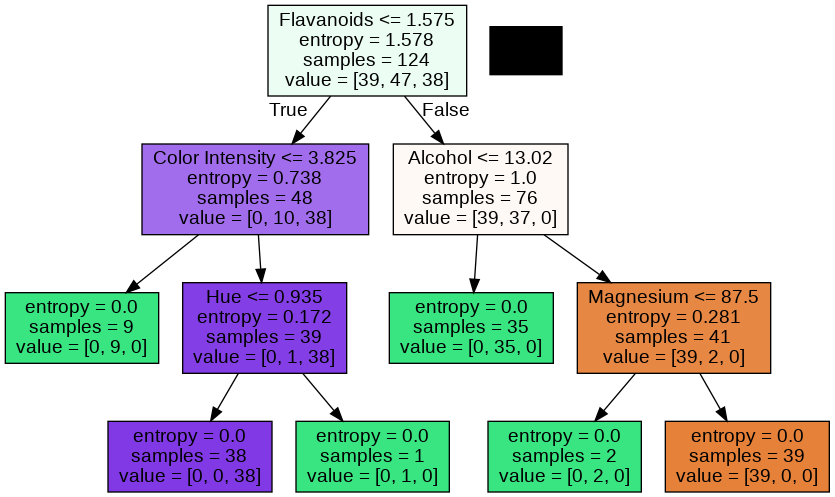

In [108]:
dot_data = StringIO()
export_graphviz(model, feature_names=X_train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [109]:
y_predict = model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt

array([[18,  2,  0],
       [ 1, 23,  0],
       [ 0,  1,  9]])

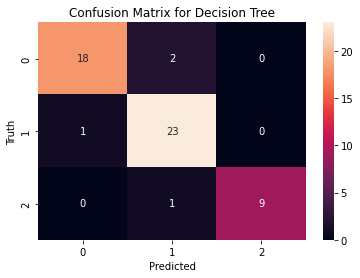

In [110]:
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [111]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92        20
           2       0.88      0.96      0.92        24
           3       1.00      0.90      0.95        10

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [113]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [114]:
classifier_rf.oob_score_

0.967741935483871

In [115]:
classifier_rf.score(X_test, y_test)

1.0

In [116]:
y_predict = model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_predict)
cm_rf

array([[18,  2,  0],
       [ 1, 23,  0],
       [ 0,  1,  9]])

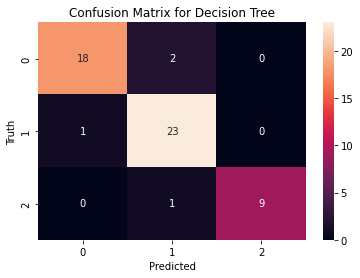

In [117]:
sns.heatmap(cm_rf, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [118]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92        20
           2       0.88      0.96      0.92        24
           3       1.00      0.90      0.95        10

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54

